In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

import seaborn as sns
sns.set_theme(style="whitegrid")

import matplotlib.pyplot as plt

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

from sklearn.linear_model import LinearRegression



 ## Data
You will need the file in the github repo, data/multi_asset_etf_data.xlsx.

The time-series data gives monthly returns for the 11 asset classes and a short-term Treasury-bill fund return, (SHV.)

The case does not give time-series data, so this data has been compiled outside of the case, and it intends to represent the main asset classes under consideration via various ETFs. For details on the specific securities/indexes, check the “Info” tab of the data.

## Excess Returns
We consider SHV as the risk-free asset.

We are going to analyze the problem in terms of excess returns, where SHV has been subtracted from the other columns.

The risk-free rate changes over time, but the assumption is that investors know it’s value one-period ahead of time. Thus, at any given point in time, it is a risk-free rate for the next period. (This is often discussed as the “bank account” or “money market account” in other settings.)

## Adjustment
For ease of analysis, drop QAI from the dataset. Analyze the remaining 10 assets.

## Not Considered
These are nominal returns-they are not adjusted for inflation, and in our calculations we are not making any adjustment for inflation.

The exhibit data that comes via Harvard with the case is unnecessary for our analysis.

## Format
In the questions below, annualize the statistics you report.

Annualize the mean of monthly returns with a scaling of 12.

Annualize the volatility of monthly returns with a scaling of 

Note that we are not scaling the raw timeseries data, just the statistics computed from it (mean, vol, Sharpe).

In [2]:
FREQ = 12
LOADFILE = 'multi_asset_etf_data.xlsx'
info = pd.read_excel(LOADFILE,sheet_name='descriptions').set_index('ticker') # ticker sheet

data = pd.read_excel(LOADFILE,sheet_name='prices').set_index('Date') # prices sheet
data = data.drop(columns = ['QAI']) # drop QAI due to missing data

rets = pd.read_excel(LOADFILE,sheet_name='total returns').set_index('Date') # returns sheet
rets = rets.drop(columns = ['QAI']) # drop QAI due to missing data

ex_rets = pd.read_excel(LOADFILE,sheet_name='excess returns').set_index('Date') # excess returns sheet
ex_rets = ex_rets.drop(columns = ['QAI']) # drop QAI due to missing data

## 1. Summary Statistics
#### Calculate and display the mean and volatility of each asset’s excess return. (Recall we use volatility to refer to standard deviation.)

#### Which assets have the best and worst Sharpe ratios?

#### Recall that the Sharpe Ratio is simply the ratio of the mean-to-volatility of excess returns:

 
#### Be sure to annualize all three statss (mean, vol, Sharpe).

In [ ]:
# Portfolio Exhibit 1: Annulized Excess Return, Volatility of Excess Return, Sharpie Ratio

def mean_std_sharpie(returns,dropna=True,FREQ=12): # function to calculate mean, std and sharpie ratio
    
        
    mean = returns.mean()*FREQ
    std = returns.std(ddof=1)*np.sqrt(FREQ)
    sharpie = mean / std
    return pd.DataFrame(np.array([mean,std,sharpie]).T, index=returns.columns, columns=['Mean_annulaized','Volatiltiy_annualized','Sharpie'])

portfolio_exhibit1 = mean_std_sharpie(ex_rets)


#printing the values
print(mean_std_sharpie(ex_rets,12))
print('\n')
print('Max Sharpie ratio', max(portfolio_exhibit1["Sharpie"]), 'by' , portfolio_exhibit1["Sharpie"].idxmax())
print('Min Sharpie ratio', min(portfolio_exhibit1["Sharpie"]), 'by' , portfolio_exhibit1["Sharpie"].idxmin())


     Mean_annulaized  Volatiltiy_annualized   Sharpie
BWX        -0.007716               0.082789 -0.093202
DBC        -0.005292               0.166553 -0.031774
EEM         0.029339               0.176164  0.166542
EFA         0.061775               0.150903  0.409372
HYG         0.041371               0.075928  0.544873
IEF         0.016404               0.063442  0.258569
IYR         0.074916               0.168675  0.444143
PSP         0.092561               0.213370  0.433804
SPY         0.128141               0.142839  0.897103
TIP         0.020502               0.051115  0.401091


Max Sharpie ratio 0.897102626289479 by SPY
Min Sharpie ratio -0.09320174565672584 by BWX


## 2. Descriptive Analysis
#### Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?

#### How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?



Max correlation ('EFA', 'PSP') value 0.9
Min correlation ('DBC', 'IEF') value -0.3


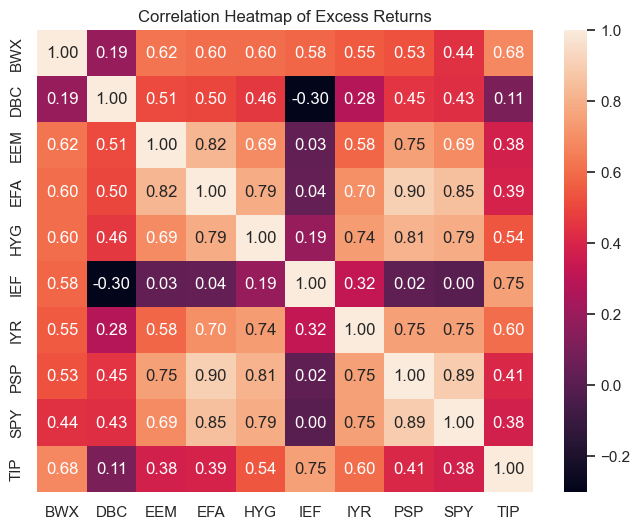

In [4]:
# Portfolio Exhibit 2: Correlation Matrix


def correlation_matrix_calc(returns):
    return returns.corr().round(2)

correlation_matrix = correlation_matrix_calc(ex_rets)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Excess Returns')

#print(correlation_matrix)
print('\n')
print('Max correlation', correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)).stack().idxmax(),
       'value', correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)).stack().max())
print('Min correlation', correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)).stack().idxmin(),
       'value', correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)).stack().min())




## How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?
### comparision with sharpie ratio 

Outperformed IEF
Underperformed HYG (Domestic Bonds)
Outperformed BWX (International Bonds)

In [18]:
#code for tangency portfolio weights
def tangency_portfolio_weights(returns):
    
    mean = returns.mean().values
    SIGMA = returns.cov().values
    delta_tan = 1 / (np.ones(len(mean)).T @ np.linalg.inv(SIGMA) @ mean) # matrix multiplication 1 * signa * mean
    w_tan = delta_tan * (np.linalg.inv(SIGMA) @ mean)# sigma * mean/ matrix multiplication 1 * signa * mean

    
    return pd.Series(w_tan, index=returns.columns, name='Tangency Weights')

## 3. The MV frontier.
#### Compute and display the weights of the tangency portfolios: 

#### Does the ranking of weights align with the ranking of Sharpe ratios?

#### Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to 

     Mean_annulaized  Volatiltiy_annualized   Sharpie  Tanegency Weights
BWX        -0.007716               0.082789 -0.093202          -0.850643
DBC        -0.005292               0.166553 -0.031774          -0.071623
EEM         0.029339               0.176164  0.166542           0.026437
EFA         0.061775               0.150903  0.409372           0.068682
HYG         0.041371               0.075928  0.544873           0.290614
IEF         0.016404               0.063442  0.258569           0.881186
IYR         0.074916               0.168675  0.444143          -0.246582
PSP         0.092561               0.213370  0.433804          -0.332995
SPY         0.128141               0.142839  0.897103           1.059632
TIP         0.020502               0.051115  0.401091           0.175293


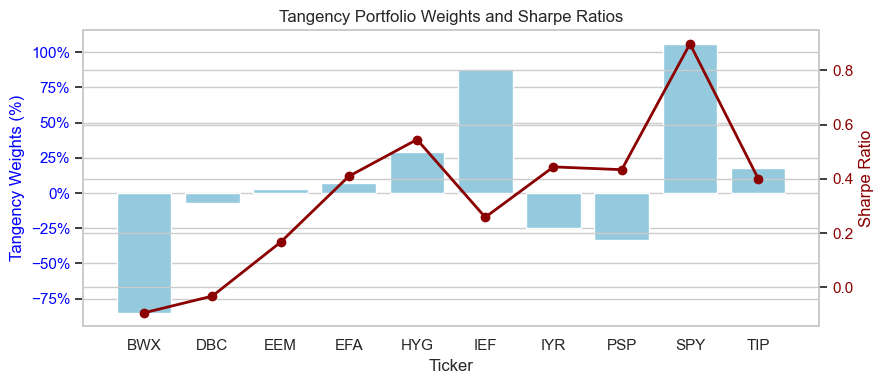

In [6]:
# Portfolio Exhibit 3: Tangency Portfolio Weights

tw = tangency_portfolio_weights(ex_rets)
tw = tw.reindex(portfolio_exhibit1.index) 
portfolio_exhibit1["Tanegency Weights"] = tw
print(portfolio_exhibit1) # tangency portfolio weights

#------------plots for sharpie and tangency ratio -----------------
from matplotlib import ticker as mtick

# --- plot (build a small DataFrame for seaborn) ---
plot_df = tw.rename("weight").reset_index()
plot_df.columns = ["ticker", "weight"]

#sharpie rati0
plot_df["sharpe"] = portfolio_exhibit1.loc[plot_df["ticker"], "Sharpie"].values

# --- plotting ---
fig, ax1 = plt.subplots(figsize=(9, 4))

# barplot for weights (left axis)
sns.barplot(data=plot_df, x="ticker", y="weight", ax=ax1, color="skyblue")
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
ax1.set_ylabel("Tangency Weights (%)", color="blue")
ax1.set_xlabel("Ticker")
ax1.tick_params(axis='y', labelcolor="blue")
# add a second axis for sharpie ratio (right axis)
ax2 = ax1.twinx()
ax2.plot(plot_df["ticker"], plot_df["sharpe"], color="darkred", marker="o", linewidth=2, label="Sharpe Ratio")
ax2.set_ylabel("Sharpe Ratio", color="darkred")
ax2.tick_params(axis='y', labelcolor="darkred")

# set y-axis limits 
plt.title("Tangency Portfolio Weights and Sharpe Ratios")
plt.tight_layout()
plt.show()




In [7]:
# computing the mean and std of tangency portfolio and sharpie ratio
w_returns = ex_rets.dot(tw)
w_returns_matrix = mean_std_sharpie(w_returns.to_frame("Tangency Weights"),12)
print('\n')
print('Tangency Portfolio Return', w_returns_matrix["Mean_annulaized"].values[0])
print('Tangency Portfolio Volatility', w_returns_matrix["Volatiltiy_annualized"].  values[0])
print('Tangency Portfolio Sharpie Ratio', w_returns_matrix["Sharpie"].values[0])



Tangency Portfolio Return 0.12852049698605567
Tangency Portfolio Volatility 0.08747709979095197
Tangency Portfolio Sharpie Ratio 1.4691901914122323


## 4. TIPS
#### Assess how much the tangency portfolio (and performance) change if…

#### TIPS are dropped completely from the investment set.

In [8]:
ex_rets_tips = ex_rets.drop(columns=["TIP"])
tw_tips = tangency_portfolio_weights(ex_rets_tips)  
tw_tips = tw_tips.reindex(portfolio_exhibit1.index)
portfolio_exhibit1["Tangency Weights (no TIP)"] = tw_tips
print('\n')
print(portfolio_exhibit1) # tangency portfolio weights without TIP

tw_tips.drop(labels=["TIP"], inplace=True)
tw_tips_returns = ex_rets_tips.dot(tw_tips)
tw_tips_returns_matrix = mean_std_sharpie(tw_tips_returns.to_frame("Tangency Weights (no TIP)"),12)
print('\n')




     Mean_annulaized  Volatiltiy_annualized   Sharpie  Tanegency Weights  \
BWX        -0.007716               0.082789 -0.093202          -0.850643   
DBC        -0.005292               0.166553 -0.031774          -0.071623   
EEM         0.029339               0.176164  0.166542           0.026437   
EFA         0.061775               0.150903  0.409372           0.068682   
HYG         0.041371               0.075928  0.544873           0.290614   
IEF         0.016404               0.063442  0.258569           0.881186   
IYR         0.074916               0.168675  0.444143          -0.246582   
PSP         0.092561               0.213370  0.433804          -0.332995   
SPY         0.128141               0.142839  0.897103           1.059632   
TIP         0.020502               0.051115  0.401091           0.175293   

     Tangency Weights (no TIP)  
BWX                  -0.879292  
DBC                  -0.063742  
EEM                   0.032493  
EFA                   0.06015

In [9]:
print('Tangency Portfolio Return (no TIP)', tw_tips_returns_matrix["Mean_annulaized"].values[0])
print('Tangency Portfolio Volatility (no TIP)', tw_tips_returns_matrix["Volatiltiy_annualized"].  values[0])
print('Tangency Portfolio Sharpie Ratio (no TIP)', tw_tips_returns_matrix["Sharpie"].values[0])

Tangency Portfolio Return (no TIP) 0.13273609387212376
Tangency Portfolio Volatility (no TIP) 0.09045212277721917
Tangency Portfolio Sharpie Ratio (no TIP) 1.4674735074935579


 #### Case - The expected excess return to TIPS is adjusted to be 0.0012 higher than what the historic sample shows.
 

In [10]:
ex_rets_increase_tips = ex_rets.copy()
ex_rets_increase_tips["TIP"] = ex_rets["TIP"] + 0.0012
tw_increase_tips = tangency_portfolio_weights(ex_rets_increase_tips)
tw_increase_tips = tw_increase_tips.reindex(portfolio_exhibit1.index)
portfolio_exhibit1["Tangency Weights (increase TIP by 0.0012)"] = tw_increase_tips

print(portfolio_exhibit1) # tangency portfolio weights with increased TIP

tw_increase_tips_returns = ex_rets_increase_tips.dot(tw_increase_tips)
tw_increase_tips_returns_matrix = mean_std_sharpie(tw_increase_tips_returns.to_frame("Tangency Weights (increase TIP by 0.0012)"),12)



     Mean_annulaized  Volatiltiy_annualized   Sharpie  Tanegency Weights  \
BWX        -0.007716               0.082789 -0.093202          -0.850643   
DBC        -0.005292               0.166553 -0.031774          -0.071623   
EEM         0.029339               0.176164  0.166542           0.026437   
EFA         0.061775               0.150903  0.409372           0.068682   
HYG         0.041371               0.075928  0.544873           0.290614   
IEF         0.016404               0.063442  0.258569           0.881186   
IYR         0.074916               0.168675  0.444143          -0.246582   
PSP         0.092561               0.213370  0.433804          -0.332995   
SPY         0.128141               0.142839  0.897103           1.059632   
TIP         0.020502               0.051115  0.401091           0.175293   

     Tangency Weights (no TIP)  Tangency Weights (increase TIP by 0.0012)  
BWX                  -0.879292                                  -0.669693  
DBC        

In [ ]:
print('Tangency Portfolio Volatility (increase TIP by 0.0012)', tw_increase_tips_returns_matrix["Volatiltiy_annualized"].values[0])
print('Tangency Portfolio Sharpie Ratio (increase TIP by 0.0012)', tw_increase_tips_returns_matrix["Sharpie"].values[0])
print('Tangency Portfolio Return (increase TIP by 0.0012)', tw_increase_tips_returns_matrix["Mean_annulaized"].values[0])



Tangency Portfolio Volatility (increase TIP by 0.0012) 0.07464758481369826
Tangency Portfolio Sharpie Ratio (increase TIP by 0.0012) 1.612396056885871
Tangency Portfolio Return (increase TIP by 0.0012) 0.12036147140966072


In [22]:
returns_matrix_summary = pd.DataFrame({
    'TIP investment Increase': tw_increase_tips_returns_matrix.squeeze(),
    'Tips removed portfolio': tw_tips_returns_matrix.squeeze(),
    'Normal Portfolio': w_returns_matrix.squeeze()
    })
print(returns_matrix_summary)

                       TIP investment Increase  Tips removed portfolio  \
Mean_annulaized                       0.120361                0.132736   
Volatiltiy_annualized                 0.074648                0.090452   
Sharpie                               1.612396                1.467474   

                       Normal Portfolio  
Mean_annulaized                0.128520  
Volatiltiy_annualized          0.087477  
Sharpie                        1.469190  


### Based on the analysis, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?
#### We are able to reach a level of risk adjusted returns that is greater than the previously optimized portfolio by adding TIPS. As such, TIPS must serve as a new asset that was not previously incorporated in our portfolio optimization process

----------------------------------------------------------------------------
# 3. Allocations
#### Continue with the same data file as the previous section.

#### Suppose the investor has a targeted mean excess return (per month) of = 0.01.
-----------------------------------------------------------------------------

## -> Equally-weighted (EW)
#### Rescale the entire weighting vector to have target mean . Thus, the element of the weight vector is,
------------------------------

In [ ]:
def equally_weighted_portfolio(returns,target_mean):
    n = returns.shape[1]
    weights = np.ones(n) / n
    mean_ew = weights @ returns.mean().values
    scaling = target_mean / mean_ew
    weights = weights * scaling
    return pd.Series(weights, index=returns.columns, name='Equally Weighted Weights')

ew = equally_weighted_portfolio(ex_rets,0.01)
ew = ew.reindex(portfolio_exhibit1.index)
#print(ew)

ew_returns = ex_rets.dot(ew)
ew_returns_matrix = mean_std_sharpie(ew_returns.to_frame("Equally Weighted Weights"),12) # sharpie ratio of equally weighted portfolio

# print('Equally Weighted Portfolio Return', ew_returns_matrix["Mean_annulaized"].values[0])
# print('Equally Weighted Portfolio Volatility', ew_returns_matrix["Volatiltiy_annualized"].  values[0])
# print('Equally Weighted Portfolio Sharpie Ratio', ew_returns_matrix["Sharpie"].values[0])


------------
## -> “Risk-parity” (RP)
#### Risk-parity is a term used in a variety of ways, but here we have in mind setting the weight of the portfolio to be proportional to the inverse of its full-sample variance estimate. Thus, the 
 #### element of the weight vector is,
 ---------------

In [13]:
def risk_parity_portfolio(returns,target_mean):
    n = returns.shape[1]
    w_to = 1 / np.diag(returns.cov().values) # risk parity weights
    w_to = w_to / sum(w_to) # scaling by inverse of variance
    scaling = target_mean / (w_to @ returns.mean().values)
    w_to = w_to * scaling
    return pd.Series(w_to, index=returns.columns, name='Risk Parity Weights')

rp = risk_parity_portfolio(ex_rets,0.01)
rp = rp.reindex(portfolio_exhibit1.index)
#print(rp)

rp_returns = ex_rets.dot(rp)
rp_returns_matrix = mean_std_sharpie(rp_returns.to_frame("Risk Parity Weights"),12) # sharpie ratio of risk parity portfolio

# print('Risk Parity Portfolio Return', rp_returns_matrix["Mean_annulaized"].values[0])
# print('Risk Parity Portfolio Volatility', rp_returns_matrix["Volatiltiy_annualized"].  values[0])
# print('Risk Parity Portfolio Sharpie Ratio', rp_returns_matrix["Sharpie"].values[0])



--
## Mean-Variance (MV)
--

In [14]:
def mean_cariance_portfolio(returns,target_mean):

    mean = returns.mean().values
    SIGMA = returns.cov().values
    ones = np.ones(len(mean))

    A = ones.T @ np.linalg.inv(SIGMA) @ ones
    B = ones.T @ np.linalg.inv(SIGMA) @ mean
    C = mean.T @ np.linalg.inv(SIGMA) @ mean
    D = A * C - B ** 2

    y1 = (C - B * target_mean) / D
    y2 = (A * target_mean - B) / D

    w_mv = y1 * (np.linalg.inv(SIGMA) @ ones) + y2 * (np.linalg.inv(SIGMA) @ mean) # new weight calculation

    return pd.Series(w_mv, index=returns.columns, name='Mean-Variance Weights')

mv = mean_cariance_portfolio(ex_rets,0.01)
mv = mv.reindex(portfolio_exhibit1.index)

mv_returns = ex_rets.dot(mv)
mv_returns_matrix = mean_std_sharpie(mv_returns.to_frame("Mean-Variance Weights"),12) # sharpie ratio of mean-variance portfolio

#print(mv)

## Comparing
#### In order to compare all these allocation methods, rescale each weight vector, such that it has targeted mean return of 

#### Calculate the performance of each of these portfolios over the sample.

#### Report their mean, volatility, and Sharpe ratio.

#### How does performance compare across allocation methods?

In [15]:
portfolio_case = pd.DataFrame({
    'Tangency Weights': tw,
    'Equally Weighted Weights': ew,
    'Risk Parity Weights': rp,
    'Mean-Variance Weights': mv})
print(portfolio_case)

     Tangency Weights  Equally Weighted Weights  Risk Parity Weights  \
BWX         -0.850643                  0.265486             0.540585   
DBC         -0.071623                  0.265486             0.133569   
EEM          0.026437                  0.265486             0.119392   
EFA          0.068682                  0.265486             0.162710   
HYG          0.290614                  0.265486             0.642698   
IEF          0.881186                  0.265486             0.920577   
IYR         -0.246582                  0.265486             0.130229   
PSP         -0.332995                  0.265486             0.081385   
SPY          1.059632                  0.265486             0.181600   
TIP          0.175293                  0.265486             1.418104   

     Mean-Variance Weights  
BWX              -0.788076  
DBC              -0.060312  
EEM               0.022324  
EFA               0.067604  
HYG               0.296057  
IEF               0.830237  
IYR 

In [16]:
print(returns_matrix_summary := pd.DataFrame({
    'Tangency Weights': w_returns_matrix.squeeze(),
    'Equally Weighted Weights': ew_returns_matrix.squeeze(),
    'Risk Parity Weights': rp_returns_matrix.squeeze(),
    'Mean-Variance Weights': mv_returns_matrix.squeeze(),
    }))



                       Tangency Weights  Equally Weighted Weights  \
Mean_annulaized                0.128520                  0.120000   
Volatiltiy_annualized          0.087477                  0.269247   
Sharpie                        1.469190                  0.445687   

                       Risk Parity Weights  Mean-Variance Weights  
Mean_annulaized                   0.120000               0.120000  
Volatiltiy_annualized             0.263919               0.081732  
Sharpie                           0.454685               1.468206  


### Interpretation:

The Mean–Variance (MV) portfolio delivers the lowest volatility for the same target return, resulting in the highest Sharpe ratio among all portfolios. This aligns with theory—MV optimization identifies the combination of assets that minimizes overall risk for a given level of expected return.

The Risk-Parity (RP) portfolio shows slightly lower volatility than the Equally Weighted (EW) portfolio, as it allocates more weight to lower-risk assets. This leads to a moderate improvement in its risk-adjusted performance.

The Equally Weighted (EW) portfolio serves as a simple benchmark. However, it exhibits the highest volatility and lowest Sharpe ratio, highlighting its relative inefficiency compared to the optimized alternatives

### Takeaway:

When all portfolios are scaled to achieve the same expected return, differences in risk efficiency become clear.
The MV portfolio offers the most efficient risk–return trade-off, RP provides a balanced middle ground, and EW—while easy to implement—remains the least efficient in managing risk.

